
# IKEA Furniture: price versus size
| Name | Description | Date 
| :- |-------------: | :-:
|Thijs Meijerink| IBM Coursera Advanced Data Science Capstone | 5th of December 2022 |


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Quality check">Data quality check</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model">Modelling</a></li>
    <ul>
    <li><a href="#nondeep">Non deep learning</a></li>
    <li><a href="#deep">Deep learning</a></li>
    </ul>
<li><a href="#conclusion">Conclusions</a></li>
</ul>



<a id='intro'></a>
## Introduction

### Context:
This review is done for the Capstone project of Coursera IBM Advanced Data Science. The data set contains details of IKEA products. 

The question for this project is: **How well does the furniture size corespond to its size?**

The analysis focuses only on the major product areas in order to base the logic on a more uniform data set.

### Content:

* item_id : Product ID
* name: commercial name 
* category: product area (Sofas, beds, chairs, Trolleys,…)
* Price: the current price in Saudi Riyals as it is shown in the website by 4/20/2020
* old_price: if applicable, initial price before discount
* Short_description: a brief description of the item.
* full_Description: a very detailed description of the item. 
* designer: The name of the designer.
* width: Width of the item in Centimeter
* height: Height of the item in Centimeter
* depth: Depth of the item in Centimeter


### Licences:
The scraped website link: https://www.ikea.com/sa/en/cat/furniture-fu001/

The data requested on 05/12/2022 via :https://www.kaggle.com/ahmedkallam/ikea-sa-furniture-web-scraping

## Importing and Loading data

In [52]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *


%matplotlib inline

In [53]:
df = pd.read_csv('//ITSEELM-NT0004/THMEI4$/Desktop/IKEA_SA_Furniture_Web_Scrapings_sss.csv',  index_col=0)

<a id='Quality check'></a>
## Data quality check

In [54]:
df[['item_id']].count()

item_id    3694
dtype: int64

3694 products are in the dataset

In [55]:
df.describe()

,item_id,price,depth,height,width
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


The difference between max and 75% values indicates that there might be outliers.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


Many null values in the furniture dimensions (depth, height and width)

Old_price is an object, which makes it useless

In [57]:
df.nunique()

item_id              2962
name                  607
category               17
price                 979
old_price             365
sellable_online         2
link                 2962
other_colors            2
short_description    1706
designer              381
depth                 114
height                193
width                 263
dtype: int64

All features have a variance of unique values

In [58]:
df.duplicated().sum()

0

No duplicates are found

<hr>

<a id='eda'></a>
## Exploratory Data Analysis

In [59]:
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [60]:
df['category'].value_counts()

Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64

Text(0.5, 1.0, 'Histogram of furniture price')

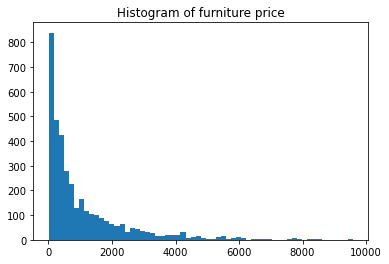

In [61]:
plt.hist(x=df['price'], bins='auto')
plt.title('Histogram of furniture price')

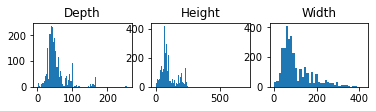

In [62]:
import matplotlib.pyplot as plt

plt.subplot(3, 3, 1)
plt.hist(x=df['depth'], bins='auto')
plt.title('Depth')

plt.subplot(3, 3, 2)
plt.hist(x=df['height'], bins='auto')
plt.title('Height')

plt.subplot(3, 3, 3)
plt.hist(x=df['width'], bins='auto')
plt.title('Width')

plt.show()

The data is slightly skewed, this might disappear when looked only per product area

### Correcting the size

We need to correct the furniture sizes as many null values are found in the size.

In [63]:
df[['depth', 'height', 'width']].isna().head(5)

,depth,height,width
0,True,False,False
1,True,False,False
2,True,True,True
3,False,False,False
4,False,False,False


In [64]:
df = df[df['depth'].notna()]
df = df[df['height'].notna()]
df = df[df['width'].notna()]
df[['depth', 'height', 'width']].isna().head(5)

,depth,height,width
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
8,False,False,False


In [65]:
df[['item_id']].count()

item_id    1899
dtype: int64

Now only 1899 products are left

In [66]:
df['category'].value_counts()

Bookcases & shelving units              375
Sofas & armchairs                       223
Chairs                                  213
Wardrobes                               199
Cabinets & cupboards                    199
Chests of drawers & drawer units        121
Tables & desks                          103
TV & media furniture                     95
Outdoor furniture                        81
Children's furniture                     78
Beds                                     78
Nursery furniture                        62
Bar furniture                            24
Sideboards, buffets & console tables     20
Café furniture                           13
Trolleys                                  9
Room dividers                             6
Name: category, dtype: int64

Now, most product areas have a small amount of product. There it is chosen to only use the top 5 product areas for further analysis.

In [67]:
catlist=['Bookcases & shelving units', 'Sofas & armchairs', 'Chairs', 'Wardrobes', 'Cabinets & cupboards']
df=df[df['category'].isin(catlist)]
df['category'].value_counts()

Bookcases & shelving units    375
Sofas & armchairs             223
Chairs                        213
Cabinets & cupboards          199
Wardrobes                     199
Name: category, dtype: int64

Lets now visualize the size of these 5 product areas

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_rect : Removed 421 rows containing missing values.


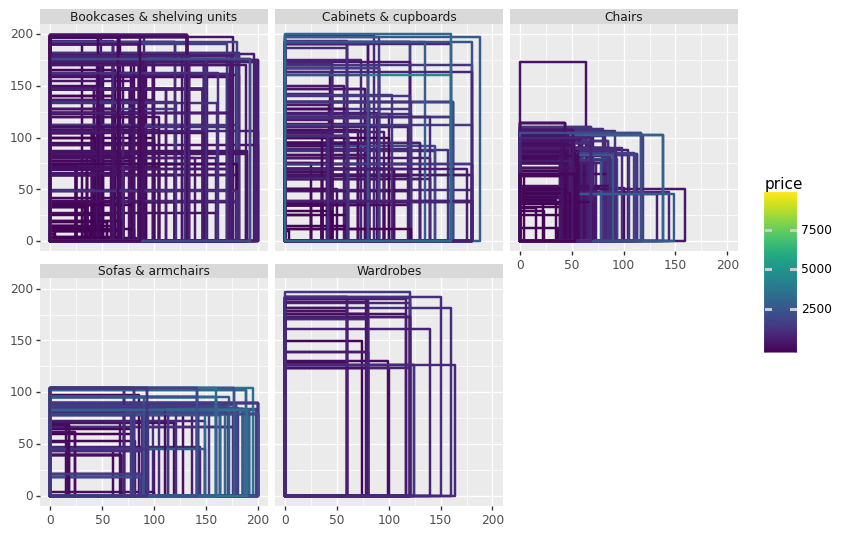

<ggplot: (114918322526)>

In [68]:
ggplot(df, aes(xmin = 0, ymin = 0, xmax = 'width', ymax = 'height', colour = 'price', size='price',  fill = 'sellable_online')) + \
geom_rect(alpha = 0.005, fill = "#FFFFFF", size = 1) + \
scale_x_continuous(limits = (0, 200)) + \
scale_y_continuous(limits = (0, 200)) + \
facet_wrap('category', ncol = 3) + \
guides()+ \
coord_fixed() +\
theme(figure_size=(9, 9)) 

<hr>

<a id='model'></a>
## Modelling


Here we briefly encode and scale our data before modelling




In [72]:
X = pd.get_dummies(df['category'])

Encode the category product area

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X['depth'] = sc.fit_transform(df[['depth']])
X['height'] = sc.fit_transform(df[['height']])
X['width'] = sc.fit_transform(df[['width']])

In [74]:
X.head()

,Bookcases & shelving units,Cabinets & cupboards,Chairs,Sofas & armchairs,Wardrobes,depth,height,width
255,1,0,0,0,0,-0.218358,-0.874673,-1.292267
256,1,0,0,0,0,-0.659182,0.791974,-0.460351
257,1,0,0,0,0,-0.218358,0.671855,0.855815
258,1,0,0,0,0,-0.688571,-0.709510,-0.609351
259,1,0,0,0,0,-0.218358,0.476662,0.657148


In [76]:
y = sc.fit_transform(df[['price']])


<a id='nondeep'></a>
### Non deep learning model

Two models are tried. One for a simple linear regression and a gradient booster.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state = 5)

In [160]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
print("Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr.score(X_test, y_test)))

from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test, y_pred)
print("MSE: {:.3f}".format(mse))

Training set score: 0.742
Test set score: 0.713
MSE: 0.480


In [161]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)
print("Training set score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(gbr.score(X_test, y_test)))

from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test, y_pred)
print("MSE: {:.3f}".format(mse))

Training set score: 0.905
Test set score: 0.783
MSE: 0.480


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


The gradient booster seems to perform better, though it does overfit a bit.

<a id='deep'></a>
### Deep learning model

Keras learning environment was chosen as it is easy to implement in Python and provides a lot of opportunities.

In [140]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import keras

In [157]:
model_2 = Sequential()
model_2.add(Dense(64,input_shape = (8,), activation='relu'))
model_2.add(Dense(12, activation='relu'))
model_2.add(Dense(12, activation="sigmoid"))
model_2.add(Dense(250, activation="sigmoid"))
model_2.add(Dense(53, activation='relu'))
model_2.add(Dense(1,activation='linear'))
model_2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 64)                576       
                                                                 
 dense_89 (Dense)            (None, 12)                780       
                                                                 
 dense_90 (Dense)            (None, 12)                156       
                                                                 
 dense_91 (Dense)            (None, 250)               3250      
                                                                 
 dense_92 (Dense)            (None, 53)                13303     
                                                                 
 dense_93 (Dense)            (None, 1)                 54        
                                                                 
Total params: 18,119
Trainable params: 18,119
Non-tra

In [158]:
model_2.compile(loss='mse', metrics=['mse'], optimizer='adam')
history= model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30,batch_size=2, shuffle=True)

Epoch 1/30
453/453 [==============================] - 2s 4ms/step - loss: 0.6375 - mse: 0.6375 - val_loss: 0.4958 - val_mse: 0.4958
Epoch 2/30
453/453 [==============================] - 2s 4ms/step - loss: 0.3246 - mse: 0.3246 - val_loss: 0.2603 - val_mse: 0.2603
Epoch 3/30
453/453 [==============================] - 2s 4ms/step - loss: 0.2613 - mse: 0.2613 - val_loss: 0.2236 - val_mse: 0.2236
Epoch 4/30
453/453 [==============================] - 2s 4ms/step - loss: 0.2547 - mse: 0.2547 - val_loss: 0.2887 - val_mse: 0.2887
Epoch 5/30
453/453 [==============================] - 2s 4ms/step - loss: 0.2538 - mse: 0.2538 - val_loss: 0.3577 - val_mse: 0.3577
Epoch 6/30
453/453 [==============================] - 2s 4ms/step - loss: 0.2332 - mse: 0.2332 - val_loss: 0.3509 - val_mse: 0.3509
Epoch 7/30
453/453 [==============================] - 2s 4ms/step - loss: 0.2455 - mse: 0.2455 - val_loss: 0.2151 - val_mse: 0.2151
Epoch 8/30
453/453 [==============================] - 2s 4ms/step - loss: 0.

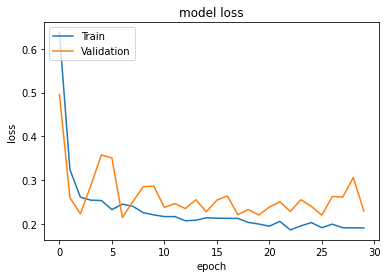

10/10 [==============================] - 0s 1ms/step
MSE: 0.480


In [159]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

y_pred_test= model_2.predict(X_test)
mean_squared_error(y_test, y_pred_test, squared=False)
mse=mean_squared_error(y_test, y_pred_test, squared=False)
print("MSE: {:.3f}".format(mse))

As shown, the MSE is high, higher than the MSE of GBR or LR. As GBR has the highest accuracy, this model will be used for future predictions

<hr>

<a id='conclusion'></a>
## Conclusions

In [165]:
print("Linear regression MSE: {:.3f}".format(mse1))
print("Gradient boost MSE: {:.3f}".format(mse2))
print("Neural network MSE: {:.3f}".format(mse))

Linear regression MSE: 0.270
Gradient boost MSE: 0.205
Neural network MSE: 0.480


The model shows that the price of product can be quite well predicted by the size of the product, when/if the product area is used. It also showed that in this particular case a traditional model works rather well, and therefore the need for a deep-learning model is not needed.

### More information

The model and the ADD product will be available on GitHub at this link. There it will be possible to download the notebook.

[GitHub Repository](https://github.com/thmeijerink/IBMAdvancedDataScience.git)